In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import our dataset
# NOTE: the variable 'df' represents 'data frame'
#full_path = "C:\\Users\\randel.bjorkquist\\Documents\\QuickStart\\DataScience\\Student_Performance.csv"
#df = pd.read_csv(full_path, parse_dates=['Test_Date'])

df = pd.read_csv('./data/admissions.csv', parse_dates=['application_date'], dtype={'approved': 'boolean'})
#df = pd.read_csv('./data/admissions.csv', dtype={'application_date': 'datetime64[ns]'}, dtype={'approved': 'boolean'})


In [4]:
df.head()

,age,employed,income,credit_score,region,application_date,approved
0,22,0,39879,507,West,2023-04-26,False
1,55,1,39475,509,North,2023-10-09,False
2,49,0,36435,486,East,2024-07-04,False
3,39,1,15000,311,East,2023-07-17,False
4,38,1,27037,452,West,2023-04-07,False


In [5]:
print(df.shape)
print(df.columns)


(300, 7)
Index(['age', 'employed', 'income', 'credit_score', 'region',
       'application_date', 'approved'],
      dtype='object')


In [6]:
print("Data Types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

#NOTE: Check if there are any duplicated rows
print('\nNumber of duplicationed rows:', df.duplicated().sum())


Data Types:
age                          int64
employed                     int64
income                       int64
credit_score                 int64
region                      object
application_date    datetime64[ns]
approved                   boolean
dtype: object

Missing values per column:
age                 0
employed            0
income              0
credit_score        0
region              0
application_date    0
approved            0
dtype: int64

Number of duplicationed rows: 0


In [7]:
print("describe")
print(df.describe())


describe
              age    employed        income  credit_score     application_date
count  300.000000  300.000000    300.000000    300.000000                  300
mean    41.470000    0.503333  34834.810000    475.800000  2024-01-02 03:21:36
min     18.000000    0.000000  15000.000000    300.000000  2023-01-01 00:00:00
25%     31.000000    0.000000  27478.250000    401.500000  2023-06-24 18:00:00
50%     41.000000    1.000000  34653.500000    475.000000  2023-12-22 12:00:00
75%     52.250000    1.000000  42415.250000    545.250000  2024-07-22 06:00:00
max     65.000000    1.000000  71989.000000    833.000000  2024-12-28 00:00:00
std     13.085866    0.500824  11242.031444    105.234282                  NaN


In [8]:
print('Unique Values per Column')
print(df.nunique())

Unique Values per Column
age                  48
employed              2
income              287
credit_score        200
region                4
application_date    251
approved              2
dtype: int64


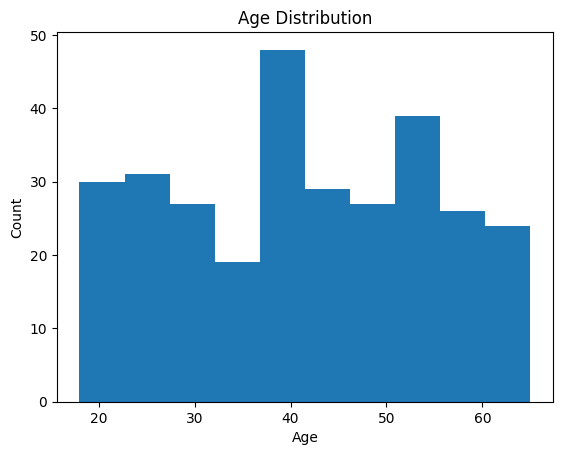

In [9]:
plt.hist(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


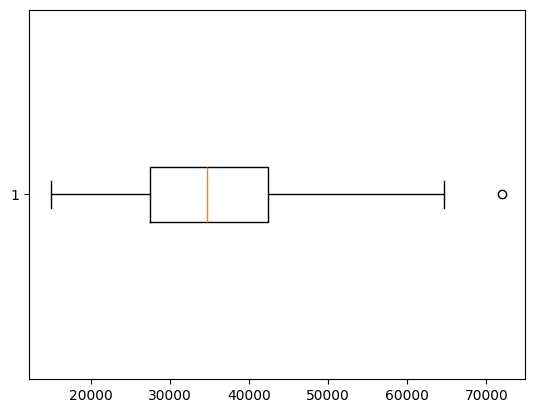

In [10]:
plt.boxplot(df['income'], vert = False)
plt.show()

Text(0.5, 1.0, 'Income Distribution')

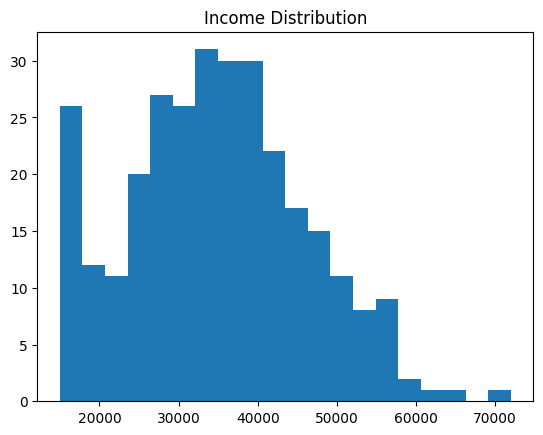

In [11]:
plt.hist(df['income'], bins=20)
plt.title('Income Distribution')

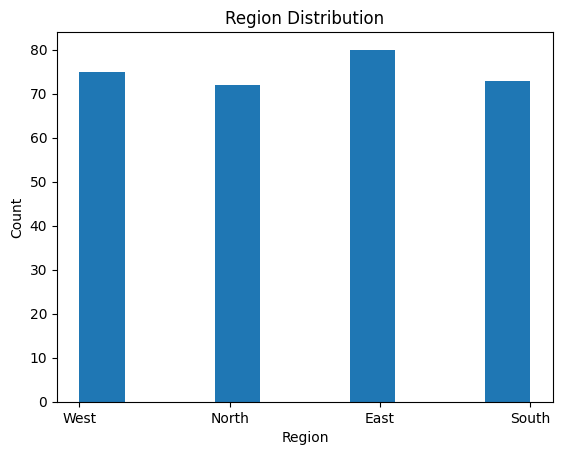

In [12]:
plt.hist(df['region'])
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

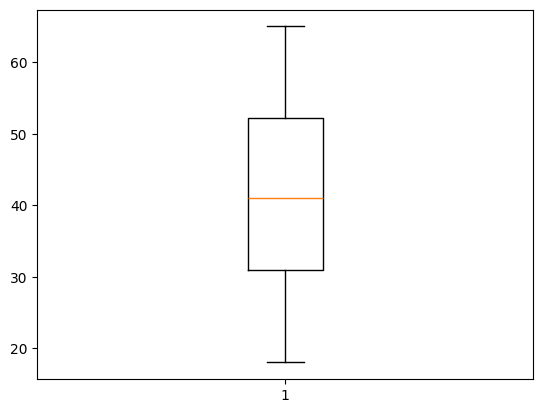

In [13]:
plt.boxplot(df['age'])
plt.show()


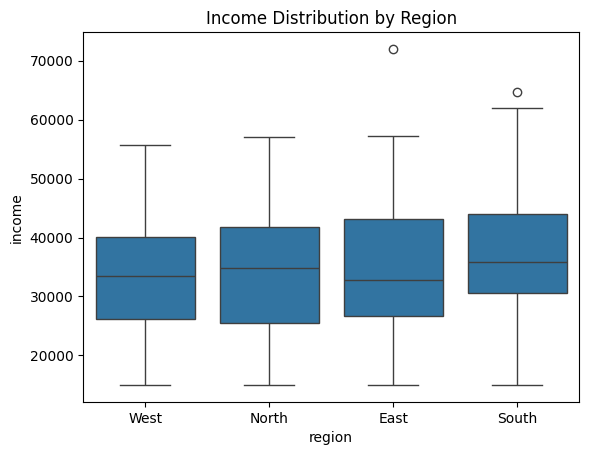

In [14]:
sns.boxplot(x='region', y='income', data=df)
plt.title('Income Distribution by Region')
plt.show()

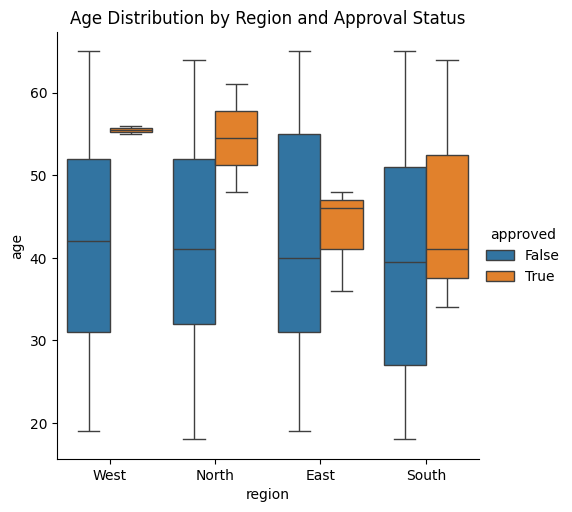

In [15]:
sns.catplot(x='region', y='age', hue='approved', kind='box', data=df)
plt.title('Age Distribution by Region and Approval Status') 
plt.show()

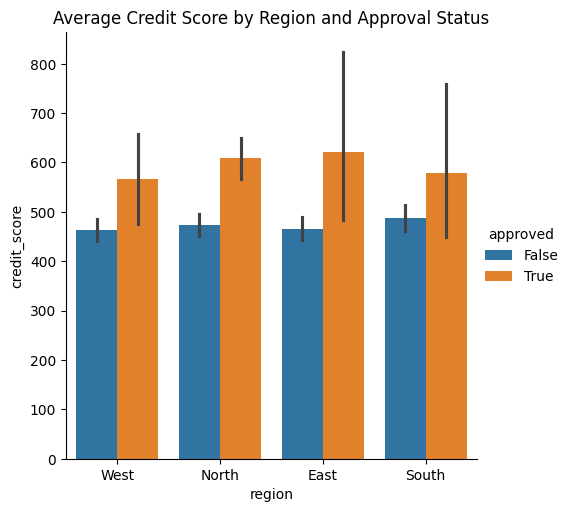

In [16]:
sns.catplot(x='region', y='credit_score', hue='approved', kind='bar', data=df)
plt.title('Average Credit Score by Region and Approval Status')
plt.show()

In [17]:
north = df[df.region == 'North']
south = df[df.region == 'South']
east = df[df.region == 'East']
west = df[df.region == 'West']

print('North Region:')
print(north.describe())

print('South Region:')
print(south.describe())

print('East Region:')
print(east.describe())

print('West Region:')
print(west.describe())

North Region:
             age   employed        income  credit_score     application_date
count  72.000000  72.000000     72.000000     72.000000                   72
mean   41.902778   0.500000  34771.888889    477.055556  2024-01-08 19:00:00
min    18.000000   0.000000  15000.000000    300.000000  2023-01-20 00:00:00
25%    32.000000   0.000000  25456.000000    397.750000  2023-08-20 06:00:00
50%    41.500000   0.500000  34800.500000    498.000000  2023-12-21 00:00:00
75%    52.000000   1.000000  41805.000000    546.250000  2024-05-30 18:00:00
max    64.000000   1.000000  57012.000000    692.000000  2024-12-17 00:00:00
std    11.900006   0.503509  11152.496914    100.043214                  NaN
South Region:
             age   employed        income  credit_score  \
count  73.000000  73.000000     73.000000     73.000000   
mean   39.767123   0.520548  36918.904110    490.246575   
min    18.000000   0.000000  15000.000000    300.000000   
25%    27.000000   0.000000  30566.000000  

In [18]:
num_cols = ['age', 'income', 'credit_score', 'employed', 'approved']
num_df   = df[num_cols].copy()

corr = num_df.corr(method='pearson' )
print(corr.round(3))



                age  income  credit_score  employed  approved
age           1.000   0.283         0.285    -0.011     0.106
income        0.283   1.000         0.903     0.349     0.225
credit_score  0.285   0.903         1.000     0.293     0.211
employed     -0.011   0.349         0.293     1.000     0.147
approved      0.106   0.225         0.211     0.147     1.000


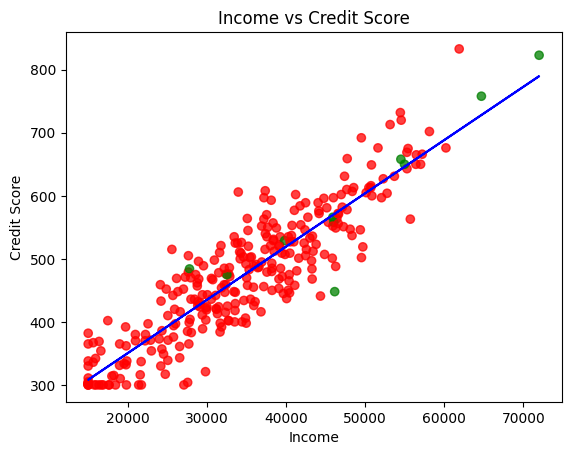

In [19]:
x = df['income']
y = df['credit_score']

plt.scatter(x, y, c=df['approved']
   .map({True: 'green', False: 'red'}), alpha=0.75)

m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='blue', label='Trend Line')


plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.title('Income vs Credit Score')
plt.show()



In [20]:
#Columns that we want to keep ...
columns_to_keep = ['age', 'income', 'credit_score', 'employed', 'region', 'approved']
cleaned_df = df[columns_to_keep].copy()

cleaned_df.head()
#cleaned_df.info()

,age,income,credit_score,employed,region,approved
0,22,39879,507,0,West,False
1,55,39475,509,1,North,False
2,49,36435,486,0,East,False
3,39,15000,311,1,East,False
4,38,27037,452,1,West,False


In [21]:
#Missing values for numeric columns:
df['age']    = df['age'].fillna(df['age'].median())
df['income'] = df['income'].fillna(df['income'].median())
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].median())


In [22]:
#NOTE: all values within a row must be identical to be considered a duplicate
#Drop rows with duplicate values 
print('\nNumber of duplicated rows:', df.duplicated().sum())
df = df.drop_duplicates()



Number of duplicated rows: 0


In [23]:
#Create features for the dataframes
#df['age_squared'] = df['age'] ** 2
#df['income_log'] = np.log1p(df['income'])
#df['credit_score_bin'] = pd.cut(df['credit_score'], bins=[0, 600, 700, 800, 900], labels=[1, 2, 3, 4])
#df['is_employed'] = df['employed'].apply(lambda x: 1 if x == True else 0)
#df['application_month'] = df['application_date'].dt.month

# Create a new binary feature 'high_risk' based on credit score and income
#df['high_risk'] = (df['credit_score'] < 300).astype(int)
df['high_risk'] = ((df['credit_score'] < 300) & (df['income'] < 20000)).astype(int)


#df['high_risk'] = (df['credit_score'] < 300).astype(bool)
#df['high_risk'] = df['credit_score'].apply(lambda x: 1 if x < 600 else 0)


In [24]:
df.head()

,age,employed,income,credit_score,region,application_date,approved,high_risk
0,22,0,39879,507,West,2023-04-26,False,0
1,55,1,39475,509,North,2023-10-09,False,0
2,49,0,36435,486,East,2024-07-04,False,0
3,39,1,15000,311,East,2023-07-17,False,0
4,38,1,27037,452,West,2023-04-07,False,0


In [25]:
X = df.drop(columns=['approved', 'application_date'])
y = df['approved']

print(X.shape, y.shape) # OUTPUTs: X.shape = (300, 6) Y.shape = (300, )


(300, 6) (300,)


In [26]:
#Change the region column to one-hot encoding
#X = pd.get_dummies(X, columns=['region'], drop_first=True)
X = pd.get_dummies(X, columns=['region'])
X.head()


,age,employed,income,credit_score,high_risk,region_East,region_North,region_South,region_West
0,22,0,39879,507,0,False,False,False,True
1,55,1,39475,509,0,False,True,False,False
2,49,0,36435,486,0,True,False,False,False
3,39,1,15000,311,0,True,False,False,False
4,38,1,27037,452,0,False,False,False,True


In [27]:
# We need training data ... split the data into training and testing sets: X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print(X_train.shape)
print(X_test.shape)


(240, 9)
(60, 9)


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [29]:
from sklearn.metrics import accuracy_score

#NOTE: Training ...
#      X_train and show it the corresponding Y_train values ...
#      y_test is the actual values for the test data ...
#      y_pred is what the model predicts for the X_test data ...

y_pred   = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9833333333333333


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666
Confusion Matrix:
 [[58  0]
 [ 1  1]]


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression


In [32]:
#Scalre feature without mean
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.9666666666666667


In [34]:
precision = precision_score(y_test, y_pred, zero_division = 0)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Precision:" ,precision)
print("Recall:"    ,recall)
print("F1 Score:"  ,f1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[58  0]
 [ 2  0]]


In [35]:
#Feature Engineering Techniques for Machine Learning Models
X.head()

,age,employed,income,credit_score,high_risk,region_East,region_North,region_South,region_West
0,22,0,39879,507,0,False,False,False,True
1,55,1,39475,509,0,False,True,False,False
2,49,0,36435,486,0,True,False,False,False
3,39,1,15000,311,0,True,False,False,False
4,38,1,27037,452,0,False,False,False,True


In [36]:
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, VarianceThreshold
from sklearn.preprocessing     import MinMaxScaler # Scale features to [0, 1] range for chi-squared test

In [37]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [38]:
#Information Gain Selection Method
mi_scores = mutual_info_classif(X, y, random_state = 42)
mi_series = pd.Series(mi_scores, index = X.columns).sort_values(ascending = False)

print("Top 3 Features by information Gain:")
print(mi_series.head(3))

print()

print("All Series information Gain:")
print(mi_series)


Top 3 Features by information Gain:
region_North    0.026513
income          0.012015
employed        0.010983
dtype: float64

All Series information Gain:
region_North    0.026513
income          0.012015
employed        0.010983
credit_score    0.009428
region_East     0.006019
age             0.000000
high_risk       0.000000
region_South    0.000000
region_West     0.000000
dtype: float64


In [39]:
#chi2_values, chi2_pvalues = chi2(X_scaled, y)

#NOTE: We only need the chi2_values for feature ranking and thus we use _ for the p-values, which means we are ignoring them.
chi2_values, _ = chi2(X_scaled, y)
chi2_series = pd.Series(chi2_values, index = X.columns).sort_values(ascending = False)

print("Top 3 Features by Chi-Squared Test:")
print(chi2_series.head(3))

print()

print("All Series Chi-Squared Test:")
print(chi2_series)


Top 3 Features by Chi-Squared Test:
employed        3.233843
income          1.695594
credit_score    1.566032
dtype: float64

All Series Chi-Squared Test:
employed        3.233843
income          1.695594
credit_score    1.566032
age             0.517714
region_South    0.136514
region_West     0.103448
region_North    0.068966
region_East     0.043103
high_risk            NaN
dtype: float64


In [40]:
#Fisher Score Selection Method
f_values, _ = f_classif(X, y)
f_series = pd.Series(f_values, index = X.columns).sort_values(ascending = False)

print("Top 3 Features by Fisher Score:")
print(f_series.head(3))

print()

print("All Series Fisher Score:")
print(f_series)


Top 3 Features by Fisher Score:
income          15.922167
credit_score    13.818569
employed         6.611173
dtype: float64

All Series Fisher Score:
income          15.922167
credit_score    13.818569
employed         6.611173
age              3.361339
region_South     0.179320
region_West      0.137075
region_North     0.090166
region_East      0.058397
high_risk             NaN
dtype: float64


d:\repos\randel-bjorkquist\JupyterNotebooks\jupyter-notebooks-vscode\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\repos\randel-bjorkquist\JupyterNotebooks\jupyter-notebooks-vscode\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [41]:
#Variance Thresholding
selector = VarianceThreshold(threshold = 0.0) # Set threshold as needed
X_reduced = selector.fit_transform(X)

print("Original number of features:" ,X.shape[1])
print(" Reduced number of features:" ,X_reduced.shape[1])

print()

#NOTE: not sure what the different, if there is any ...
#variances = selector.fit(X).variances_
#var_series = pd.Series(variances, index = X.columns).sort_values(ascending = False)
selector.fit(X)
var_series = pd.Series(selector.variances_, index = X.columns).sort_values(ascending = False)

print("Top 3 Features by Fisher Score:")
print(var_series.head(3))

print()

print("All Series Fisher Score:")
print(var_series)


Original number of features: 9
 Reduced number of features: 8

Top 3 Features by Fisher Score:
income          56989.0
credit_score      533.0
age                47.0
dtype: float64

All Series Fisher Score:
income          56989.000000
credit_score      533.000000
age                47.000000
employed            0.249989
region_East         0.195556
region_West         0.187500
region_South        0.184122
region_North        0.182400
high_risk           0.000000
dtype: float64


In [43]:
#for threshold in [0.0, 0.01, 0.05]:
for threshold in [0.0, 0.01, 0.1]:
    selector = VarianceThreshold(threshold = threshold)
    X_reduced = selector.fit_transform(X)
    kept_features = X.columns[selector.get_support()]

    print(f"Threshold: {threshold:.2f} => Number of features: {X_reduced.shape[1]}")
    print(f"Kept features: {list(kept_features)}")

Threshold: 0.00 => Number of features: 8
Kept features: ['age', 'employed', 'income', 'credit_score', 'region_East', 'region_North', 'region_South', 'region_West']
Threshold: 0.01 => Number of features: 8
Kept features: ['age', 'employed', 'income', 'credit_score', 'region_East', 'region_North', 'region_South', 'region_West']
Threshold: 0.10 => Number of features: 8
Kept features: ['age', 'employed', 'income', 'credit_score', 'region_East', 'region_North', 'region_South', 'region_West']


In [49]:
# Now variance test
#from sklearn.feature_selection import VarianceThreshold

selector0 = VarianceThreshold(threshold = 0.1).fit(X)
var0 = pd.Series(selector0.variances_, index=X.columns)

selector01 = VarianceThreshold(threshold = 100).fit(X)
var01 = pd.Series(selector01.variances_, index=X.columns)

print("Threshold = 0.1")
print(var0.head(3))

print("\nThreshold = 100")
print(var01.head(3))


Threshold = 0.1
age         1.706691e+02
employed    2.499889e-01
income      1.259620e+08
dtype: float64

Threshold = 100
age         1.706691e+02
employed    2.499889e-01
income      1.259620e+08
dtype: float64


In [50]:
#import pandas as pd
#import numpy as np

# Manual variance calculation
manual_variances = { }

for col in X.columns:
    values = X[col].values
    mean_val = np.mean(values)
    variance = np.mean((values - mean_val) ** 2)   # formula
    manual_variances[col] = variance

manual_var_series = pd.Series(manual_variances)

print("Manual variance calculation:")
print(manual_var_series.head(3))

Manual variance calculation:
age         1.706691e+02
employed    2.499889e-01
income      1.259620e+08
dtype: float64


In [53]:
#Correlation
corrs = { }

for col in X.columns:
  corr = np.corrcoef(X[col], y)[0, 1]
  corrs[col] = abs(corr)

corr_series = pd.Series(corrs).sort_values(ascending = False)

print("Top 3 Features by Correlation with Target:")
print(corr_series.head(3))


Top 3 Features by Correlation with Target:
income          0.225211
credit_score    0.210514
employed        0.147322
dtype: float64


d:\repos\randel-bjorkquist\JupyterNotebooks\jupyter-notebooks-vscode\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\repos\randel-bjorkquist\JupyterNotebooks\jupyter-notebooks-vscode\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [56]:
results = pd.DataFrame({ "Information Gain": mi_series
                        ,"Chi2": chi2_series
                        ,"Fisher": f_series
                        ,"Correlation": corr_series
                        ,"Variance": var_series })

print("Feature Selection Results:")
print(results)


Feature Selection Results:
              Information Gain      Chi2     Fisher  Correlation      Variance
age                   0.000000  0.517714   3.361339     0.105612     47.000000
credit_score          0.009428  1.566032  13.818569     0.210514    533.000000
employed              0.010983  3.233843   6.611173     0.147322      0.249989
high_risk             0.000000       NaN        NaN          NaN      0.000000
income                0.012015  1.695594  15.922167     0.225211  56989.000000
region_East           0.006019  0.043103   0.058397     0.013997      0.195556
region_North          0.026513  0.068966   0.090166     0.017392      0.182400
region_South          0.000000  0.136514   0.179320     0.024523      0.184122
region_West           0.000000  0.103448   0.137075     0.021442      0.187500


In [59]:
from sklearn.utils import resample
print(df.columns.tolist())

#Separate the classes
df_majority = df[df['approved'] == False]
df_minority = df[df['approved'] == True]

print(df_majority.shape)
print(df_minority.shape)

# Upsample minority class
#df_minority_upsampled = resample(df_minority, 
#                                 replace=True,     # sample with replacement
#                                 n_samples=len(df_majority),    # to match majority class
#                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
#print(df_upsampled['approved'].value_counts())

['age', 'employed', 'income', 'credit_score', 'region', 'application_date', 'approved', 'high_risk']
(290, 8)
(10, 8)


In [60]:
#Resampling Techniques
df_minority_upsampled = resample( df_minority
                                 ,replace = True                # sample with replacement
                                 ,n_samples = len(df_majority)  # to match majority class
                                 ,random_state = 42 )           # reproducible results

df_minority_upsampled.shape

# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
#print(df_upsampled['approved'].value_counts())

(290, 8)

In [62]:
df_balanced = pd.concat([df_majority, df_minority_upsampled])
print(df_balanced['approved'].value_counts())

approved
False    290
True     290
Name: count, dtype: Int64


In [64]:
X_balanced = df_balanced.drop(columns=['approved', 'application_date', 'high_risk', 'region'])
y_balanced = df_balanced['approved']

print(X_balanced.shape, y_balanced.shape) # OUTPUTs: X.shape = (300, 6) Y.shape = (300, )
X_balanced.head()

(580, 4) (580,)


,age,employed,income,credit_score
0,22,0,39879,507
1,55,1,39475,509
2,49,0,36435,486
3,39,1,15000,311
4,38,1,27037,452


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.2, random_state = 42, stratify=y_balanced)
print(X_train.shape, X_test.shape)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


(464, 4) (116, 4)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [73]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

print("Precision:", precision_score(y_test, y_pred, zero_division = 0))
print("Recall:", recall_score(y_test, y_pred, zero_division = 0))
print("F1:", f1_score(y_test, y_pred, zero_division = 0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



0.9741379310344828
Precision: 0.9508196721311475
Recall: 1.0
F1: 0.9747899159663865
Confusion Matrix:
 [[55  3]
 [ 0 58]]


In [76]:
indices = (y_pred == True) & (y_test == False)
false_positives = X_test[indices].copy()
print(false_positives)


     age  employed  income  credit_score
177   25         0   45852           501
155   49         1   46287           549
73    24         0   46278           488


In [78]:
results = pd.DataFrame({'actual': y_test, 'predicted': y_pred}, index = X_test.index)
df_with_predictions = df_balanced.join(results, how='left')
false_positives = df_with_predictions[(df_with_predictions['actual'] == False) & (df_with_predictions['predicted'] == True)]
print(false_positives)

     age  employed  income  credit_score region application_date  approved  \
73    24         0   46278           488  South       2024-11-09     False   
155   49         1   46287           549  North       2023-12-04     False   
177   25         0   45852           501   East       2024-02-15     False   

     high_risk actual  predicted  
73           0  False        1.0  
155          0  False        1.0  
177          0  False        1.0  


In [79]:
# Grok AI Code ....
#import numpy as np
#import pandas as pd

# Assuming y_test and y_pred are NumPy arrays or Pandas Series
# and X_test is a Pandas DataFrame containing the test records

# Convert to NumPy arrays if they are Pandas Series
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Find indices where actual is 0 and predicted is 1 (False Positives)
fp_indices = np.where((y_test == 0) & (y_pred == 1))[0]

# If X_test is a DataFrame, get the corresponding records
if isinstance(X_test, pd.DataFrame):
    fp_records = X_test.iloc[fp_indices]
else:
    # If X_test is a NumPy array
    fp_records = X_test[fp_indices]

# Print the records
print("False Positive Records (actual = 0, predicted = 1):")
print(fp_records)

# Optionally, if you want to see the corresponding y_test and y_pred values
fp_labels = pd.DataFrame({'y_test': y_test[fp_indices], 'y_pred': y_pred[fp_indices]})
print("\nLabels for False Positives:")
print(fp_labels)

False Positive Records (actual = 0, predicted = 1):
     age  employed  income  credit_score
177   25         0   45852           501
155   49         1   46287           549
73    24         0   46278           488

Labels for False Positives:
   y_test  y_pred
0   False     1.0
1   False     1.0
2   False     1.0
